# For Linkedin  : DBSCAN, KMeans, Gaussian Mixture Models

In [9]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd

<AxesSubplot:title={'center':'Noisy Moon'}>

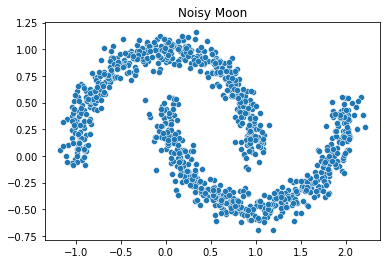

In [10]:
X,y = make_moons(n_samples = 1000, noise = 0.08, random_state =42)
plt.title('Noisy Moon')
sn.scatterplot(x = X[:,0],y = X[:,1], palette='tab10')

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
## Lets assume that we dont know the data has 2 clusters 
## Lets use Silhoutte score to identify the num_clusters

sscore = []
for cluster_ in range(2,10):
    KM = KMeans(n_clusters=cluster_, n_init=10)
    KM.fit(X)
    dist_from_centres= KM.transform(X)
    predicted_labels = KM.predict(X)
    sscore.append(silhouette_score(dist_from_centres,predicted_labels))

Text(0, 0.5, 'Avg Silhoutte Score')

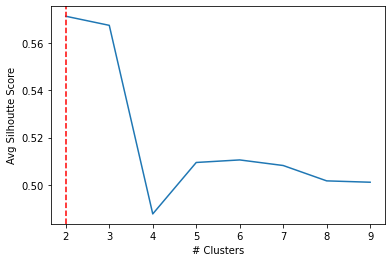

In [12]:
plt.plot(range(2,10),sscore)
best_k = np.argmax(sscore)+2
plt.axvline(x = best_k, color = 'red', linestyle = 'dashed')
plt.xlabel('# Clusters')
plt.ylabel('Avg Silhoutte Score')

Text(0.5, 1.0, 'KMeans Clustering for a non-convex dataset')

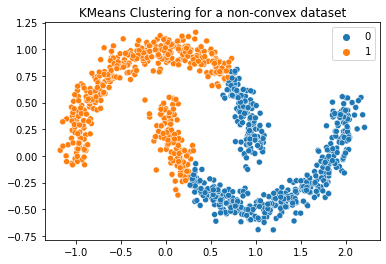

In [13]:
KM = KMeans(n_clusters=2)
KM.fit(X)
labels = KM.predict(X)
sn.scatterplot(x = X[:,0],y = X[:,1], hue = labels, palette='tab10')
plt.title("KMeans Clustering for a non-convex dataset")

In [14]:
## Doing a DBSCAN Clustering
## Figuring out the value for Epsilon first
from sklearn.neighbors import NearestNeighbors
N_count = 5
NN = NearestNeighbors(n_neighbors= N_count+1)
NN.fit(X)

NearestNeighbors(n_neighbors=6)

In [15]:
distances, indices = NN.kneighbors(X)
distances = distances[:,N_count]
df = pd.DataFrame(indices[:,0], columns = ['P1'])
df['distance'] = distances
df = df.sort_values(by = ['distance'], axis = 0)


### creating cumulative as well
arr = np.array([1]*len(df))
arr = np.cumsum(arr)/np.sum(arr)
df['cumsum'] = arr
df.head(2)


,P1,distance,cumsum
483,483,0.018876,0.001
807,807,0.020516,0.002


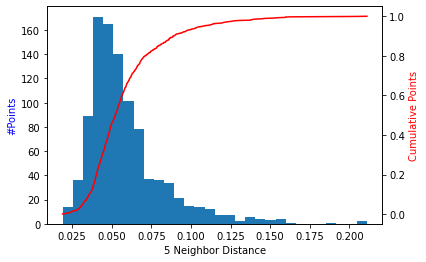

In [16]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.hist(x = df['distance'], bins = 30)
ax2.plot(df['distance'], df['cumsum'], 'r-')

ax1.set_xlabel( str(N_count)+' Neighbor Distance')
ax1.set_ylabel('#Points', color='b')
ax2.set_ylabel('Cumulative Points', color='r')

plt.show()

num_cluster 3
Contains outlier


Text(0.5, 1.0, 'DBSCAN for a non-convex dataset : Blue are Outliers')

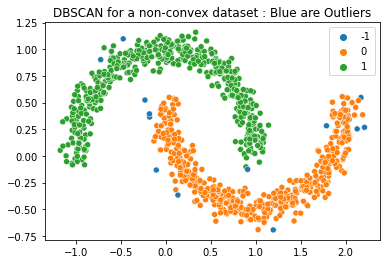

In [17]:
## At distance = 0.05, majority of the points are covered
from sklearn.cluster import DBSCAN
mod = DBSCAN(eps = 0.1, min_samples=5)
mod.fit(X)
dbs_labels = mod.labels_
print('num_cluster',len(np.unique(dbs_labels)))
print("Contains outlier") if len(np.where(np.unique(dbs_labels)))>=1 else print("No Outliers Marked")

sn.scatterplot(x = X[:,0],y = X[:,1], hue = dbs_labels, palette='tab10')
plt.title("DBSCAN for a non-convex dataset : Blue are Outliers")